## Machine Learning for the Geological Sciences
### Decision Trees & Ensemble Methods
##### By: Jackson R. Tomski – Geophysicist/Machine Learning Specialist
#### What should you take from this workflow?
* Become familiar with how to implement decision trees and the various ensemble methods, and understand the difference between each of these methods

__Decision Trees:__
* Decision trees are designed to replicate the decision making process that our brain makes, and the implications that branch off from that previous decision in a tree based structure. However, when using decision trees in regression problems, for example, we may run into overfitting to the data, which will hurt our model performance. As a result, we will look into Ensemble Methods, which branch off from decision trees, and aim to avoid this overfitting issue

__Ensemble Methods:__
* The various ensemble methods all build off of decision trees, where the following are the three types of ensemble methods that will be discussed and implemented in this workflow (*content/method descriptions below are barrowed from Wikipedia and Scikit-Learn*):
    1. __Gradient Tree Boosting:__
        * This method produces prediction models in the form of an ensemble of weak prediction models, which are typically decision trees, and builds the model in a stage-wise fashion. It then generalizes them by allowing for the optimization of an arbitrary differentiable loss function, where for a regression problem, at each stage a fit is made on the negative gradient of this loss function

    2. __Tree Bagging (i.e., bootstrap aggregating):__
        * This method is designed to improve the stability and accuracy of a given machine learning model. It also aims to reduce the model variance and mitigates the of overfitting to the data. It can do this by growing the trees long and complicated, pruning them back, and then averaging over all the trees. It a regression problem, it also reducing the chance of overfitting to the data by fitting a given base regressor model on a random subset of the original dataset, and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a method can typically reduce the variance of a decision tree estimator by introducing randomization into its construction procedure, at which point it then makes an ensemble out of it
        
    3. __Random Forest (a more sophisticated form of tree bagging):__
        * This method is similar to bagging, but it can now perform tasks by constructing many decision trees at training time on various sub-samples of the dataset. It then outputs the class that is the mode of the classes (classification), or the mean prediction (regression) of the individual trees. These random decision forests help mitigate the overfitting to the data that is common to the general decision trees method. Moreover, this sub-sample size is always the same as the original input sample size, but the samples are drawn with replacement by performing bootstrapping (i.e., random sampling with replacement to create uncertainty in a sample statistic)

Before demonstrating the use of decision trees, let's first load in our libraries and the dataset to be used here (i.e., the Bakken production dataset)

In [8]:
###################################################################################################################
import numpy as np                                              # ndarrys for gridded data
import pandas as pd                                             # DataFrames for tabular data
import os                                                       # Set working directory, run executables
import matplotlib.pyplot as plt                                 # For plotting
import seaborn as sns                                           # For matrix scatter plots
import warnings                                                 # Allows the code to ignore uneccessary warnings
from sklearn import preprocessing                               # Allows for feature engineering
from sklearn.model_selection import train_test_split            # Dataset spplit to get training and testing datasets
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn import tree                                        # Tree based method #1
from sklearn.ensemble import GradientBoostingRegressor          # Tree based method #2
from sklearn.ensemble import BaggingRegressor                   # Tree based method #3
from sklearn.ensemble import RandomForestRegressor              # Tree based method #4
warnings.filterwarnings('ignore')
sns.set(font_scale=0.8)
###################################################################################################################
os.chdir("/Users/jacksontomski/Desktop/Desktop_Folders/GEO391/GEO391_2020/GEO391_SummerWork/Updated_GEO391_Labs_Workflows_Datasets_HWs/Datasets/")
###################################################################################################################
df = pd.read_excel("Structured_Bakken_Production_Data.xlsx", sheet_name="Bakken_Only_Producing_Pools")
df.head().T
###################################################################################################################

,0,1,2,3,4
TD,2.084800e+04,2.045700e+04,2.064000e+04,1.984200e+04,2.123500e+04
bottom,2.081000e+04,2.045700e+04,2.064000e+04,1.984200e+04,2.123500e+04
top,1.122400e+04,1.088500e+04,1.081600e+04,1.090000e+04,1.097400e+04
CTB,1.177680e+05,1.185020e+05,1.187590e+05,1.191000e+05,1.191350e+05
fluid_bbl,5.766100e+04,4.894400e+04,6.057800e+04,4.008700e+04,3.774300e+04
fluid_bbl_per_ft,6.000000e+00,5.000000e+00,6.000000e+00,4.000000e+00,3.000000e+00
fluid_gal,2.421762e+06,2.055648e+06,2.544276e+06,1.683654e+06,1.585206e+06
fluid_gal_per_ft,2.520000e+02,2.140000e+02,2.580000e+02,1.880000e+02,1.540000e+02
propp_lbs,2.757929e+06,3.756800e+06,3.681460e+06,2.611100e+06,2.590710e+06
propp_lbs_per_ft,2.870000e+02,3.920000e+02,3.740000e+02,2.920000e+02,2.520000e+02


Before we go along and use each tree based method to predict our desired target feature, let's first create a function in order to reduce the amount of code to write that calculates the model performance metrics for our given training and testing datasets. Note that we will derive those datasets after implementing the metrics function here too given random sampling, and 2 predictive features with 1 target feature (i.e., cum_oil_365). Also, let's calculate some percentiles for our given target feature to help with displaying the resulting target feature values in the feature space, which will be normalized latitude and longitude. Moreover, all the features are min/max normalized here between -1 and +1 to help improve the model performance for each tree based method, and we will min/max our target feature between 0 and 1 for the same reason/goal

In [9]:
###################################################################################################################
def metrics(y_train, y_pred_train, y_test, y_pred_test):
    """
    :param y_train:         Derived training data from performing random sampling
    :param y_pred_train:    The resulting predicted training data from the given tree based method
    :param y_test:          Derived testing data from performing random sampling
    :param y_pred_test:     The resulting predicted testing data from the given tree based method
    :return:                The model perfromance metrics for the given tree based method
    - RMSE = Root Mean Squared Error
    - MAPE = Mean Absolute Percentage Error
    """
    # Model Performance Metrics for Training Data
    rmse_train = float(np.sqrt(mean_squared_error(y_train, y_pred_train)) * 100)
    mape_train = float(np.mean(mean_absolute_error(y_train, y_pred_train) / y_train) * 100)
    ve_train = float(explained_variance_score(y_train, y_pred_train) * 100)
    r2_train = float(r2_score(y_train, y_pred_train) * 100)
    
    # Model Performance Metrics for Testing Data
    rmse_test = float(np.sqrt(mean_squared_error(y_test, y_pred_test)) * 100)
    mape_test = float(np.mean(mean_absolute_error(y_test, y_pred_test) / y_test) * 100)
    ve_test = float(explained_variance_score(y_test, y_pred_test) * 100)
    r2_test = float(r2_score(y_test, y_pred_test) * 100)
    
    return rmse_train, mape_train, ve_train, r2_train, rmse_test, mape_test, ve_test, r2_test

###################################################################################################################
columns = ['TD', 'bottom', 'top', 'CTB', 'fluid_bbl', 'fluid_bbl_per_ft', 'fluid_gal', 'fluid_gal_per_ft', 'propp_lbs', 'propp_lbs_per_ft', 'max_treat_press', 'max_treat_rate', 'stages', 'ft_per_stage', 'lateral_length', 'Latitude', 'Longitude', 'cum_oil_365']
df = pd.DataFrame(df, columns=columns)
# Standardized the data between -1.0 and 1.0
scaler = preprocessing.MinMaxScaler(feature_range=(-1.0, 1.0))
scaler.fit(df)
df = scaler.transform(df)
df = pd.DataFrame(df, columns=columns)
# Keep target feature between 0 and 1 however
target = 'cum_oil_365'
df[target] = (df[target] - df[target].min()) / (df[target].max() - df[target].min())
df[target] = df[target].replace(0, 0.0001)  # Cause can't divide by zero when calculting the MAPE
###################################################################################################################
# Predictive Features
pred_norm = df[['Longitude', 'Latitude']].values
# Target Feature
response_norm = df[[target]].values
# Get some target percentiles as a means of plotting later on in the workflow
y_p005 = np.percentile(response_norm, 0.5, axis=0)[0]   # = 0.02195404
y_p995 = np.percentile(response_norm, 99.5, axis=0)[0]  # = 0.63074601
y_p01 = np.percentile(response_norm, 1.0, axis=0)[0]    # = 0.02759568
y_p99 = np.percentile(response_norm, 99.0, axis=0)[0]   # = 0.51353509
# Deriving Training and Testing datasets given Random Sampling
# where X represents the predictive features, and y represents the target feature
X_train, X_test, y_train, y_test = train_test_split(pred_norm, response_norm, test_size=0.3, random_state=4030)
###################################################################################################################

In this workflow, we will use a tree based method to predict cum_oil_365, and then tune the hyperparameters in order to achieve optimal results. Once all that is done, we will then spatially predict cum_oil_365 across the entire map. Therefore, in order to reduce the amount of code written, let's derive a function in order to perform spatial production prediction for a given tree based method

In [10]:
###################################################################################################################
def spatial_production_prediction(regressor_new, title_str, X_train, X_test, y_train, y_test):
    ###################################################################################################################
    # Training and Testing dataset given just Latitude and Longitude as predictive features
    X_train_new = X_train[:, [1, 0]];   X_test_new = X_test[:, [1, 0]]
    y_train_new = y_train;              y_test_new = y_test
    ###############################################
    regressor_new_train = regressor_new.fit(X=X_train_new, y=y_train_new)
    regressor_new_test = regressor_new.fit(X=X_test_new, y=y_test_new)

    ###################################################################################################################
    zmin = y_p01;  zmax = y_p99; xy_spacing = 50; z_spacing = 1000
    cmap = plt.cm.get_cmap('RdYlBu')    # RdYlBu_r, inferno, seismic, plasma
    x_min_train, x_max_train = X_train_new[:, 0].min() - 0.01, X_train_new[:, 0].max() + 0.01
    x_min_test, x_max_test = X_test_new[:, 0].min() - 0.01, X_test_new[:, 0].max() + 0.01
    y_min_train, y_max_train = X_train_new[:, 1].min() - 0.01, X_train_new[:, 1].max() + 0.01
    y_min_test, y_max_test = X_test_new[:, 1].min() - 0.01, X_test_new[:, 1].max() + 0.01
    xx_train, yy_train = np.meshgrid(np.linspace(x_min_train, x_max_train, xy_spacing), np.linspace(y_min_train, y_max_train, xy_spacing))
    xx_test, yy_test = np.meshgrid(np.linspace(x_min_test, x_max_test, xy_spacing), np.linspace(y_min_test, y_max_test, xy_spacing))
    inner_part_train = np.c_[xx_train.ravel(), yy_train.ravel()]
    inner_part_test = np.c_[xx_test.ravel(), yy_test.ravel()]
    zz_train = regressor_new_train.predict(inner_part_train).reshape(xx_train.shape)
    zz_test = regressor_new_test.predict(inner_part_test).reshape(xx_test.shape)

    ###################################################################################################################
    plt.figure(figsize=(15, 6.5))
    ###############################################
    plt.subplot(1, 2, 1)
    cs = plt.contourf(xx_train, yy_train, zz_train, cmap=cmap, vmin=zmin, vmax=zmax, levels=np.linspace(zmin, zmax, z_spacing))
    im = plt.scatter(X_train_new[:, 0], X_train_new[:, 1], c=y_train_new.ravel(), cmap=cmap, vmin=zmin, vmax=zmax, alpha=0.8, linewidths=0.3, edgecolors="black")
    cbar = plt.colorbar(im, orientation='vertical')
    cbar.set_label('cum_oil_365', rotation=270, labelpad=20)
    plt.title('Predicted cum_oil_365 of Training Data Given ' + title_str)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.ylim(-1.01, 1.01)
    plt.xlim(-1.01, 1.01)
    ###############################################
    plt.subplot(1, 2, 2)
    cs = plt.contourf(xx_test, yy_test, zz_test, cmap=cmap, vmin=zmin, vmax=zmax, levels=np.linspace(zmin, zmax, z_spacing))
    im = plt.scatter(X_test_new[:, 0], X_test_new[:, 1], c=y_test_new.ravel(), cmap=cmap, vmin=zmin, vmax=zmax, alpha=0.8, linewidths=0.3, edgecolors="black")
    cbar = plt.colorbar(im, orientation='vertical')
    cbar.set_label('cum_oil_365', rotation=270, labelpad=20)
    plt.title('Predicted cum_oil_365 of Testing Data Given ' + title_str)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.ylim(-1.01, 1.01)
    plt.xlim(-1.01, 1.01)
    ###################################################################################################################
    plt.tight_layout()
    plt.show()
    ###################################################################################################################

Now with all that declared and out of the way, let's look into our first tree based method: *Decision Trees*

#### Decision Trees parameters used here:
* __splitter__: The method used to choose the split at each node
* __max_depth__: Maximum depth of tree
* __min_samples_split__: Minimum number of samples that are required to split an internal node
* __max_features__: Number of features to examine when looking for the best split
* __random_state__: To ensure that the same results are obtained each time the workflow is ran

Training RMSE: 5.883% , MAPE: 42.729% , Exp_var: 64.306% , R^2: 64.306%
Testing  RMSE: 8.005% , MAPE: 51.347% , Exp_var: 37.096% , R^2: 36.958%


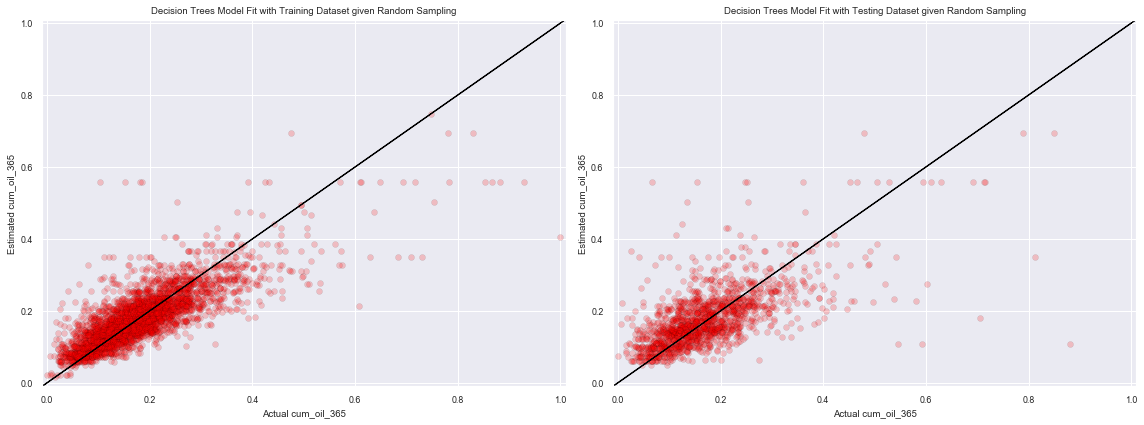

In [11]:
###################################################################################################################
def decision_tree_prod_prediction_model(random_seed, max_depths, plot_this, plot_min, plot_max, X_train, X_test, y_train, y_test):
    ###################################################################################################################
    # Decision Tree Hyperparameters
    splitters = 'best'
    max_depths = max_depths
    min_samples_splits = 23
    max_featuress = 'sqrt'
    random_seed = random_seed
    ###################################################################################################################
    dt_regressor = tree.DecisionTreeRegressor(splitter=splitters, max_depth=max_depths, min_samples_split=min_samples_splits, max_features=max_featuress, random_state=random_seed)
    dt_regressor.fit(X=X_train, y=y_train)
    y_pred_train_dt = dt_regressor.predict(X_train)
    y_pred_test_dt = dt_regressor.predict(X_test)

    ###################################################################################################################
    dt_rmse_train, dt_mape_train, dt_ve_train, dt_r2_train, dt_rmse_test, dt_mape_test, dt_ve_test, dt_r2_test = metrics(y_train, y_pred_train_dt, y_test, y_pred_test_dt)
    
    ###################################################################################################################
    if plot_this == True:
        print('Training RMSE: ' + str(round(dt_rmse_train, 3)) + '% , MAPE: ' + str(round(dt_mape_train, 3)) + '% , Exp_var: ' + str(round(dt_ve_train, 3)) + '% , R^2: ' + str(round(dt_r2_train, 3)) + '%')
        print('Testing  RMSE: ' + str(round(dt_rmse_test, 3)) + '% , MAPE: ' + str(round(dt_mape_test, 3)) + '% , Exp_var: ' + str(round(dt_ve_test, 3)) + '% , R^2: ' + str(round(dt_r2_test, 3)) + '%')
        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(y_train, y_pred_train_dt, s=None, c='red', alpha=0.2, linewidths=0.3, edgecolors="black")
        plt.title('Decision Trees Model Fit with Training Dataset given Random Sampling')
        plt.xlabel('Actual cum_oil_365')
        plt.ylabel('Estimated cum_oil_365')
        plt.xlim(plot_min, plot_max)
        plt.ylim(plot_min, plot_max)
        plt.arrow(plot_min, plot_min, plot_max, plot_max, width=0.001, color='black', head_length=5.0, head_width=0.0)
        plt.subplot(1, 2, 2)
        plt.scatter(y_test, y_pred_test_dt, s=None, c='red', alpha=0.2, linewidths=0.3, edgecolors="black")
        plt.title('Decision Trees Model Fit with Testing Dataset given Random Sampling')
        plt.xlabel('Actual cum_oil_365')
        plt.ylabel('Estimated cum_oil_365')
        plt.xlim(plot_min, plot_max)
        plt.ylim(plot_min, plot_max)
        plt.arrow(plot_min, plot_min, plot_max, plot_max, width=0.001, color='black', head_length=5.0, head_width=0.0)
        plt.tight_layout()
        plt.show()
    ###################################################################################################################
    return dt_r2_test, dt_ve_test, dt_rmse_test, dt_mape_test
    ###################################################################################################################
dt_r2_test, dt_ve_test, dt_rmse_test, dt_mape_test = decision_tree_prod_prediction_model(9307, 30, True, -0.01, 1.01, X_train, X_test, y_train, y_test)
###################################################################################################################

__Decision Tree Hyperparameter Tuning:__

Complete of 45:  5,  10,  15,  20,  25,  30,  35,  40,  45,  

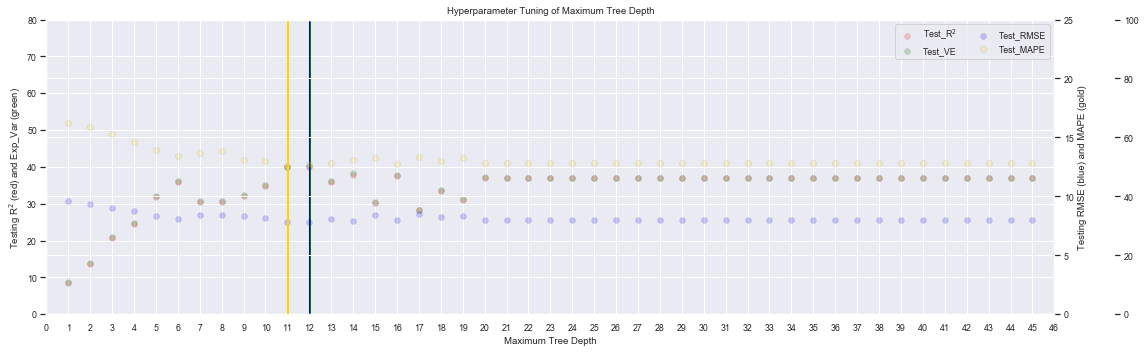

Results achieved with max_depth of:          12
Results achieved with random_seed of:        9307

For the maximum tree depth:
   Min Testing RMSE Achieved:                7.81%
   Min Testing MAPE Achieved:                50.453%
   Max Testing Explained Variance Achieved:  40.272%
   Max Testing R^2 Achieved:                 39.983%

Training RMSE: 6.338% , MAPE: 46.546% , Exp_var: 58.583% , R^2: 58.583%
Testing  RMSE: 7.81% , MAPE: 51.012% , Exp_var: 40.272% , R^2: 39.983%


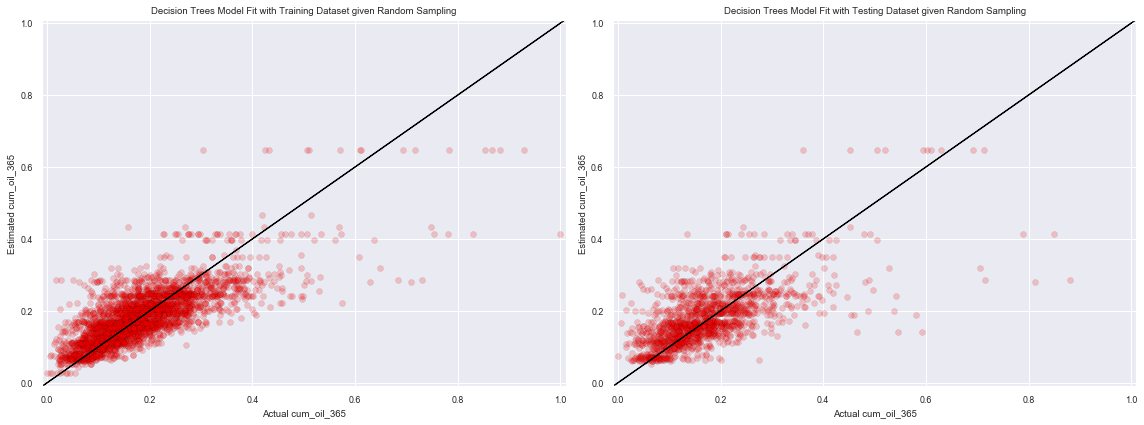

In [12]:
###################################################################################################################
random_seed = 9307
max_depths = np.linspace(1, 45, 45)         # Set the maximum tree depths to consider
dt_hyper_tune_r2 = []
dt_hyper_tune_ve = []
dt_hyper_tune_rmse = []
dt_hyper_tune_mape = []
index = 1
print('Complete of ' + str(len(max_depths)) + ': ', end =" ")
for max_depth in max_depths:                            # Loop over tree depths

    dt_r2_test, dt_ve_test, dt_rmse_test, dt_mape_test = decision_tree_prod_prediction_model(random_seed, int(max_depth), False, -0.01, 1.01, X_train, X_test, y_train, y_test)
    dt_hyper_tune_r2.append([dt_r2_test])
    dt_hyper_tune_ve.append([dt_ve_test])
    dt_hyper_tune_rmse.append([dt_rmse_test])
    dt_hyper_tune_mape.append([dt_mape_test]) 
    if index % 5 == 0: print(str(index) + ', ', end =" ")
    index += 1

###################################################################################################################
# This gives creates the derived list into a numpy array
dt_hyper_tune_r2_array = np.array(dt_hyper_tune_r2)
dt_hyper_tune_ve_array = np.array(dt_hyper_tune_ve)
dt_hyper_tune_rmse_array = np.array(dt_hyper_tune_rmse)
dt_hyper_tune_mape_array = np.array(dt_hyper_tune_mape)
#########################################################
# This gives the optimal metric value given that hyperparameter value
dt_r2_max_max_depths = np.round(np.max(dt_hyper_tune_r2_array), 3)
dt_exp_var_max_max_depths = np.round(np.max(dt_hyper_tune_ve_array), 3)
dt_rmse_min_max_depths = np.round(np.min(dt_hyper_tune_rmse_array), 3)
dt_mape_min_max_depths = np.round(np.min(dt_hyper_tune_mape_array), 3)
#########################################################
# This gives the index position of the optimal hyperparameter value with respect to the optimal metric value
dt_optimal_r2_max_depths = [i for i, x in enumerate(dt_hyper_tune_r2_array) if x == np.max(dt_hyper_tune_r2_array)][0]
dt_optimal_exp_var_max_depths = [i for i, x in enumerate(dt_hyper_tune_ve_array) if x == np.max(dt_hyper_tune_ve_array)][0]
dt_optimal_rmse_max_depths = [i for i, x in enumerate(dt_hyper_tune_rmse_array) if x == np.min(dt_hyper_tune_rmse_array)][0]
dt_optimal_mape_max_depths = [i for i, x in enumerate(dt_hyper_tune_mape_array) if x == np.min(dt_hyper_tune_mape_array)][0]
#########################################################
# This gives the optimal hyperparameter value for the optimal testing explained variance metric value
dt_max_depth_save_state = int(max_depths[dt_optimal_exp_var_max_depths])
###################################################################################################################
plt.figure(figsize=(16, 5))
ax3 = plt.subplot(1, 1, 1); ax4 = ax3.twinx(); ax04 = ax3.twinx()   # Plot the variance explained & RMSE vs. tree depth
ax04.spines['right'].set_position(('outward', 60))
ax3.arrow(max_depths[dt_optimal_r2_max_depths], 0.0, 0.0, 100.1, width=0.03, color='red', head_length=0.0, head_width=0.0)
s1 = ax3.scatter(max_depths, dt_hyper_tune_r2, c='red', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_R$^2$')
ax3.arrow(max_depths[dt_optimal_exp_var_max_depths], 0.0, 0.0, 100.1, width=0.025, color='green', head_length=0.0, head_width=0.0)
s2 = ax3.scatter(max_depths, dt_hyper_tune_ve, c='green', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_VE')
ax4.arrow(max_depths[dt_optimal_rmse_max_depths], 0.0, 0.0, 100.1, width=0.015, color='blue', head_length=0.0, head_width=0.0)
s3 = ax4.scatter(max_depths, dt_hyper_tune_rmse, c='blue', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_RMSE')
ax04.arrow(max_depths[dt_optimal_mape_max_depths], 0.0, 0.0, 100.1, width=0.01, color='gold', head_length=0.0, head_width=0.0)
s4 = ax04.scatter(max_depths, dt_hyper_tune_mape, c='gold', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_MAPE')
ax3.set_title('Hyperparameter Tuning of Maximum Tree Depth')
ax3.set_xlabel('Maximum Tree Depth')
ax3.set_ylabel('Testing R$^2$ (red) and Exp_Var (green)')
ax4.set_ylabel('Testing RMSE (blue) and MAPE (gold)')
ax3.set_xlim(0.0, 45.0)
ax3.set_ylim(0.0, 80.0)
ax4.set_ylim(0.0, 25.0)
ax04.set_ylim(0.0, 100.0)
ax3.set_xticks(np.arange(max_depths.min()-1, max_depths.max()+2, step=1))
ax4.set_xticks(np.arange(max_depths.min()-1, max_depths.max()+2, step=1))
ax04.set_xticks(np.arange(max_depths.min()-1, max_depths.max()+2, step=1))
plt.legend([s1, s2, s3, s4], ['Test_R$^2$', 'Test_VE', 'Test_RMSE', 'Test_MAPE'], ncol=2)
plt.tight_layout()
plt.show()
###################################################################################################################
print("Results achieved with max_depth of:          " + str(dt_max_depth_save_state))
print("Results achieved with random_seed of:        " + str(random_seed))
print("\nFor the maximum tree depth:")
print("   Min Testing RMSE Achieved:                " + str(round(dt_rmse_min_max_depths, 3)) + '%')
print("   Min Testing MAPE Achieved:                " + str(round(dt_mape_min_max_depths, 3)) + '%')
print("   Max Testing Explained Variance Achieved:  " + str(round(dt_exp_var_max_max_depths, 3)) + '%')
print("   Max Testing R^2 Achieved:                 " + str(round(dt_r2_max_max_depths, 3)) + '%')
###################################################################################################################
print()
dt_r2_test, dt_ve_test, dt_rmse_test, dt_mape_test = decision_tree_prod_prediction_model(random_seed, dt_max_depth_save_state, True, -0.01, 1.01, X_train, X_test, y_train, y_test)
###################################################################################################################

__Decision Tree Spatial Production Prediction:__

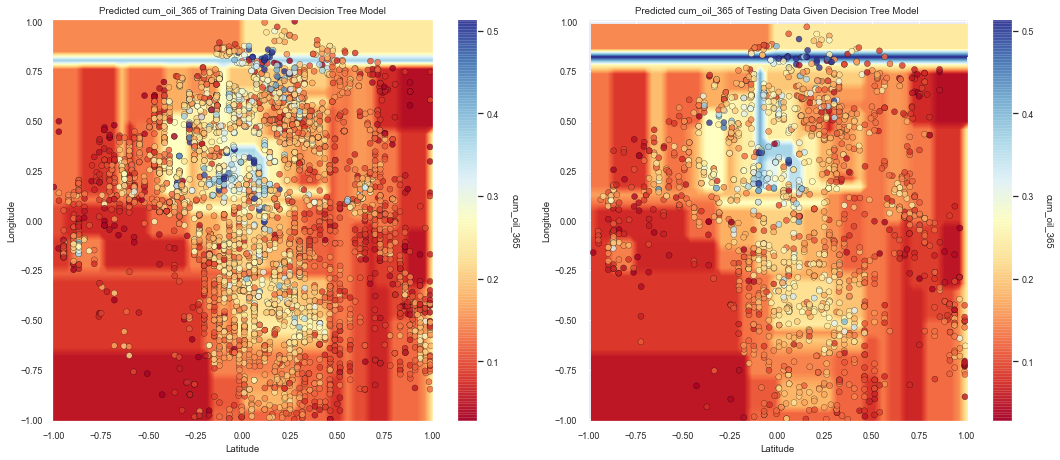

In [6]:
###################################################################################################################
# Update Hyperparameters for 2D Spatial Prediction
min_samples_splits = 23
dt_regressor_new = tree.DecisionTreeRegressor(splitter='best', max_depth=dt_max_depth_save_state, min_samples_split=min_samples_splits, max_features='sqrt', random_state=9307)
spatial_production_prediction(dt_regressor_new, 'Decision Tree Model', X_train, X_test, y_train, y_test)
###################################################################################################################

We see that the decision tree model gives okay results for predicting production, and is clearly overfitting to the data when we see how it predicts production spatially. With that, let's now move onto our next tree based method: *Gradient Tree Boosting*

#### Gradient Tree Boosting parameters used here:
* __max_depth__: Maximum depth of individual regression trees/estimators
* __min_samples_split__: Minimum number of samples required to split an internal node
* __max_features__: Number of features to examine when looking for the best split
* __random_state__: To ensure that the same results are obtained each time the workflow is ran
* __learning_rate__: Learning rate shrinks the contribution of each tree by learning_rate, where there is a trade-off between learning_rate and n_estimators (i.e., trees)
* __n_estimators__: The number of boosting stages to perform, where gradient boosting is pretty robust to overfitting, so a large number usually results in better performance

Training RMSE: 3.205% , MAPE: 24.807% , Exp_var: 89.405% , R^2: 89.405%
Testing  RMSE: 7.156% , MAPE: 46.468% , Exp_var: 49.831% , R^2: 49.623%


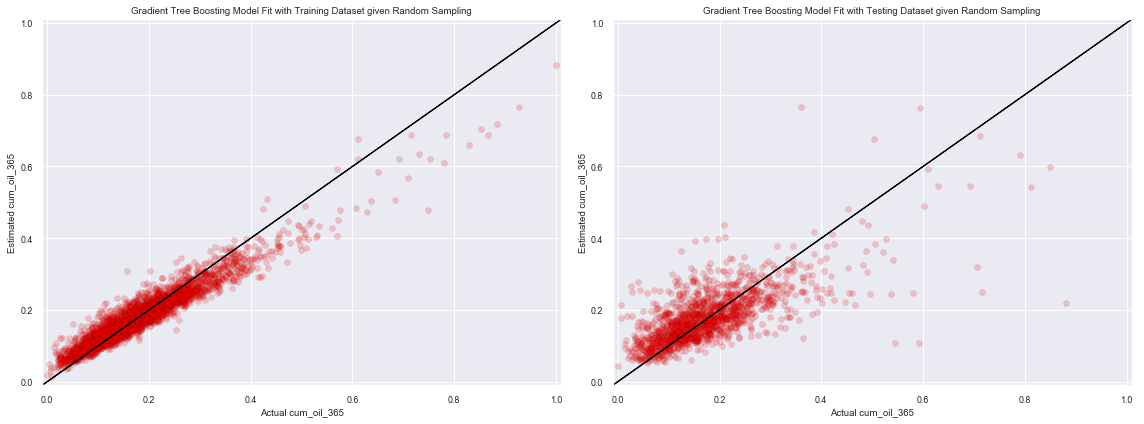

In [7]:
###################################################################################################################
def gradient_tree_boosting_prod_prediction_model(random_seed, max_depths, learning_rates, n_estimatorss, plot_this, plot_min, plot_max, X_train, X_test, y_train, y_test):
    ###################################################################################################################
    # Gradient Tree Boosting Hyperparameters
    max_depths = max_depths
    min_samples_splits = 31
    max_featuress = 'sqrt'
    random_seed = random_seed
    learning_rates = learning_rates
    n_estimatorss = n_estimatorss
    ###################################################################################################################
    gtb_regressor = GradientBoostingRegressor(learning_rate=learning_rates, max_depth=max_depths, min_samples_split=min_samples_splits, max_features=max_featuress, n_estimators=n_estimatorss, random_state=random_seed)
    gtb_regressor.fit(X=X_train, y=y_train)
    y_pred_train_gtb = gtb_regressor.predict(X_train)
    y_pred_test_gtb = gtb_regressor.predict(X_test)

    ###################################################################################################################
    gtb_rmse_train, gtb_mape_train, gtb_ve_train, gtb_r2_train, gtb_rmse_test, gtb_mape_test, gtb_ve_test, gtb_r2_test = metrics(y_train, y_pred_train_gtb, y_test, y_pred_test_gtb)
    
    ###################################################################################################################
    if plot_this == True:
        print('Training RMSE: ' + str(round(gtb_rmse_train, 3)) + '% , MAPE: ' + str(round(gtb_mape_train, 3)) + '% , Exp_var: ' + str(round(gtb_ve_train, 3)) + '% , R^2: ' + str(round(gtb_r2_train, 3)) + '%')
        print('Testing  RMSE: ' + str(round(gtb_rmse_test, 3)) + '% , MAPE: ' + str(round(gtb_mape_test, 3)) + '% , Exp_var: ' + str(round(gtb_ve_test, 3)) + '% , R^2: ' + str(round(gtb_r2_test, 3)) + '%')
        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(y_train, y_pred_train_gtb, s=None, c='red', alpha=0.2, linewidths=0.3, edgecolors="black")
        plt.title('Gradient Tree Boosting Model Fit with Training Dataset given Random Sampling')
        plt.xlabel('Actual cum_oil_365')
        plt.ylabel('Estimated cum_oil_365')
        plt.xlim(plot_min, plot_max)
        plt.ylim(plot_min, plot_max)
        plt.arrow(plot_min, plot_min, plot_max, plot_max, width=0.001, color='black', head_length=5.0, head_width=0.0)
        plt.subplot(1, 2, 2)
        plt.scatter(y_test, y_pred_test_gtb, s=None, c='red', alpha=0.2, linewidths=0.3, edgecolors="black")
        plt.title('Gradient Tree Boosting Model Fit with Testing Dataset given Random Sampling')
        plt.xlabel('Actual cum_oil_365')
        plt.ylabel('Estimated cum_oil_365')
        plt.xlim(plot_min, plot_max)
        plt.ylim(plot_min, plot_max)
        plt.arrow(plot_min, plot_min, plot_max, plot_max, width=0.001, color='black', head_length=5.0, head_width=0.0)
        plt.tight_layout()
        plt.show()
    ###################################################################################################################
    return gtb_r2_test, gtb_ve_test, gtb_rmse_test, gtb_mape_test
    ###################################################################################################################
gtb_r2_test, gtb_ve_test, gtb_rmse_test, gtb_mape_test = gradient_tree_boosting_prod_prediction_model(9307, 30, 0.05, 65, True, -0.01, 1.01, X_train, X_test, y_train, y_test)
###################################################################################################################

__Gradient Tree Boosting Hyperparameter Tuning:__

Complete of 45:  5,  10,  15,  20,  25,  30,  35,  40,  45,  

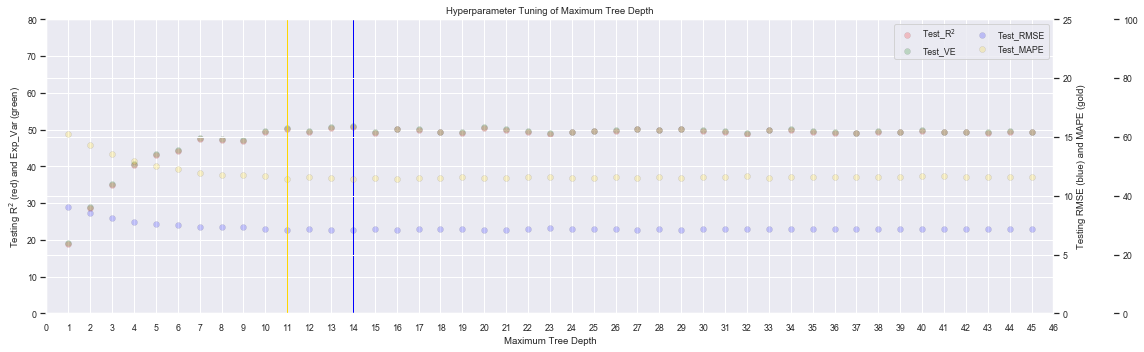

Results achieved with max_depth of:          14
Results achieved with random_seed of:        9307

For the maximum tree depth:
   Min Testing RMSE Achieved:                7.081%
   Min Testing MAPE Achieved:                45.747%
   Max Testing Explained Variance Achieved:  50.894%
   Max Testing R^2 Achieved:                 50.674%

Training RMSE: 4.208% , MAPE: 32.173% , Exp_var: 81.745% , R^2: 81.745%
Testing  RMSE: 7.081% , MAPE: 45.791% , Exp_var: 50.894% , R^2: 50.674%


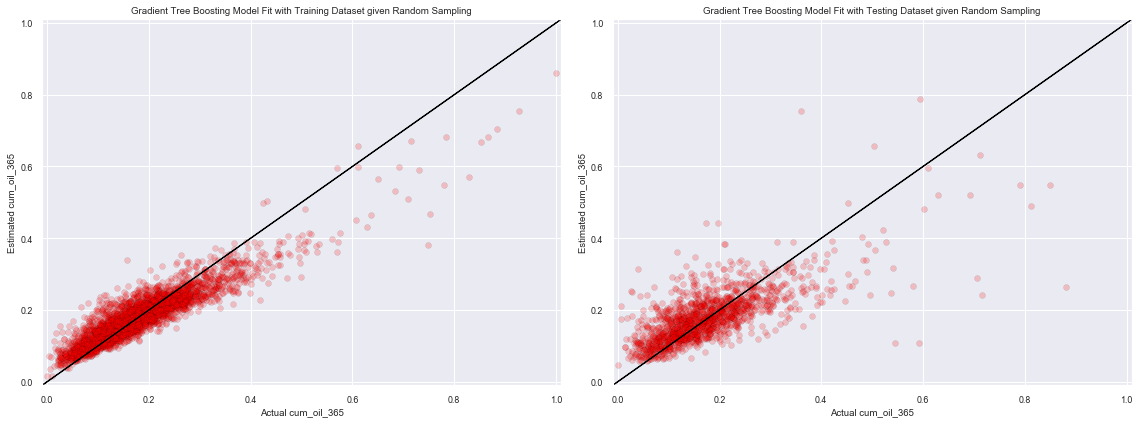

In [8]:
###################################################################################################################
random_seed = 9307
max_depths = np.linspace(1, 45, 45)         # Set the maximum tree depths to consider
gtb_hyper_tune_r2 = []
gtb_hyper_tune_ve = []
gtb_hyper_tune_rmse = []
gtb_hyper_tune_mape = []
index = 1
print('Complete of ' + str(len(max_depths)) + ': ', end =" ")
for max_depth in max_depths:                            # Loop over tree depths

    gtb_r2_test, gtb_ve_test, gtb_rmse_test, gtb_mape_test = gradient_tree_boosting_prod_prediction_model(random_seed, int(max_depth), 0.05, 65, False, -0.01, 1.01, X_train, X_test, y_train, y_test)
    gtb_hyper_tune_r2.append([gtb_r2_test])
    gtb_hyper_tune_ve.append([gtb_ve_test])
    gtb_hyper_tune_rmse.append([gtb_rmse_test])
    gtb_hyper_tune_mape.append([gtb_mape_test])
    if index % 5 == 0: print(str(index) + ', ', end =" ")
    index += 1

###################################################################################################################
# This gives creates the derived list into a numpy array
gtb_hyper_tune_r2_array = np.array(gtb_hyper_tune_r2)
gtb_hyper_tune_ve_array = np.array(gtb_hyper_tune_ve)
gtb_hyper_tune_rmse_array = np.array(gtb_hyper_tune_rmse)
gtb_hyper_tune_mape_array = np.array(gtb_hyper_tune_mape)
#########################################################
# This gives the optimal metric value given that hyperparameter value
gtb_r2_max_max_depths = np.round(np.max(gtb_hyper_tune_r2_array), 3)
gtb_exp_var_max_max_depths = np.round(np.max(gtb_hyper_tune_ve_array), 3)
gtb_rmse_min_max_depths = np.round(np.min(gtb_hyper_tune_rmse_array), 3)
gtb_mape_min_max_depths = np.round(np.min(gtb_hyper_tune_mape_array), 3)
#########################################################
# This gives the index position of the optimal hyperparameter value with respect to the optimal metric value
gtb_optimal_r2_max_depths = [i for i, x in enumerate(gtb_hyper_tune_r2_array) if x == np.max(gtb_hyper_tune_r2_array)][0]
gtb_optimal_exp_var_max_depths = [i for i, x in enumerate(gtb_hyper_tune_ve_array) if x == np.max(gtb_hyper_tune_ve_array)][0]
gtb_optimal_rmse_max_depths = [i for i, x in enumerate(gtb_hyper_tune_rmse_array) if x == np.min(gtb_hyper_tune_rmse_array)][0]
gtb_optimal_mape_max_depths = [i for i, x in enumerate(gtb_hyper_tune_mape_array) if x == np.min(gtb_hyper_tune_mape_array)][0]
#########################################################
# This gives the optimal hyperparameter value for the optimal testing explained variance metric value
gtb_max_depth_save_state = int(max_depths[gtb_optimal_exp_var_max_depths])
###################################################################################################################
plt.figure(figsize=(16, 5))
ax3 = plt.subplot(1, 1, 1); ax4 = ax3.twinx(); ax04 = ax3.twinx()   # Plot the variance explained & RMSE vs. tree depth
ax04.spines['right'].set_position(('outward', 60))
ax3.arrow(max_depths[gtb_optimal_r2_max_depths], 0.0, 0.0, 100.1, width=0.03, color='red', head_length=0.0, head_width=0.0)
s1 = ax3.scatter(max_depths, gtb_hyper_tune_r2, c='red', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_R$^2$')
ax3.arrow(max_depths[gtb_optimal_exp_var_max_depths], 0.0, 0.0, 100.1, width=0.025, color='green', head_length=0.0, head_width=0.0)
s2 = ax3.scatter(max_depths, gtb_hyper_tune_ve, c='green', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_VE')
ax4.arrow(max_depths[gtb_optimal_rmse_max_depths], 0.0, 0.0, 100.1, width=0.015, color='blue', head_length=0.0, head_width=0.0)
s3 = ax4.scatter(max_depths, gtb_hyper_tune_rmse, c='blue', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_RMSE')
ax04.arrow(max_depths[gtb_optimal_mape_max_depths], 0.0, 0.0, 100.1, width=0.01, color='gold', head_length=0.0, head_width=0.0)
s4 = ax04.scatter(max_depths, gtb_hyper_tune_mape, c='gold', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_MAPE')
ax3.set_title('Hyperparameter Tuning of Maximum Tree Depth')
ax3.set_xlabel('Maximum Tree Depth')
ax3.set_ylabel('Testing R$^2$ (red) and Exp_Var (green)')
ax4.set_ylabel('Testing RMSE (blue) and MAPE (gold)')
ax3.set_xlim(0.0, 45.0)
ax3.set_ylim(0.0, 80.0)
ax4.set_ylim(0.0, 25.0)
ax04.set_ylim(0.0, 100.0)
ax3.set_xticks(np.arange(max_depths.min()-1, max_depths.max()+2, step=1))
ax4.set_xticks(np.arange(max_depths.min()-1, max_depths.max()+2, step=1))
ax04.set_xticks(np.arange(max_depths.min()-1, max_depths.max()+2, step=1))
plt.legend([s1, s2, s3, s4], ['Test_R$^2$', 'Test_VE', 'Test_RMSE', 'Test_MAPE'], ncol=2)
plt.tight_layout()
plt.show()
###################################################################################################################
print("Results achieved with max_depth of:          " + str(gtb_max_depth_save_state))
print("Results achieved with random_seed of:        " + str(random_seed))
print("\nFor the maximum tree depth:")
print("   Min Testing RMSE Achieved:                " + str(round(gtb_rmse_min_max_depths, 3)) + '%')
print("   Min Testing MAPE Achieved:                " + str(round(gtb_mape_min_max_depths, 3)) + '%')
print("   Max Testing Explained Variance Achieved:  " + str(round(gtb_exp_var_max_max_depths, 3)) + '%')
print("   Max Testing R^2 Achieved:                 " + str(round(gtb_r2_max_max_depths, 3)) + '%')
###################################################################################################################
print()
gtb_r2_test, gtb_ve_test, gtb_rmse_test, gtb_mape_test = gradient_tree_boosting_prod_prediction_model(random_seed, gtb_max_depth_save_state, 0.05, 65, True, -0.01, 1.01, X_train, X_test, y_train, y_test)
###################################################################################################################

__Gradient Tree Boosting Spatial Production Prediction:__

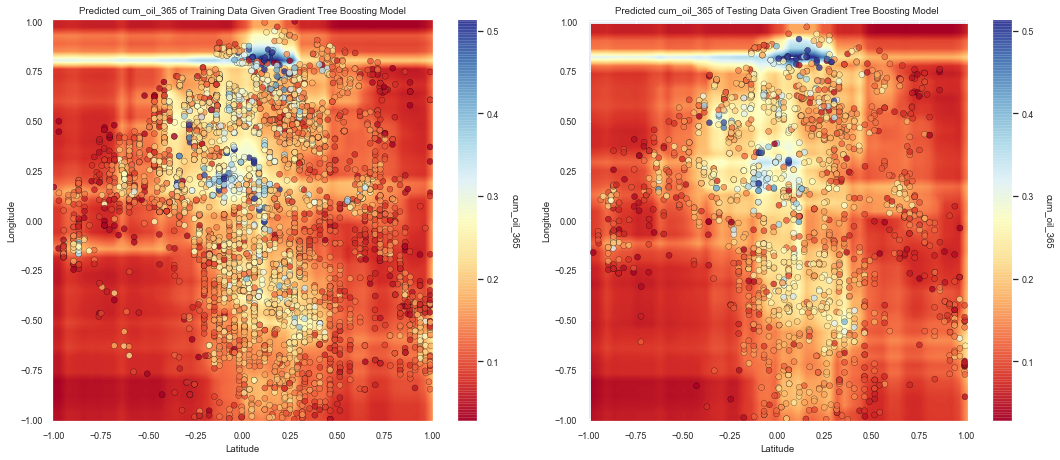

In [9]:
###################################################################################################################
# Update Hyperparameters for 2D Spatial Prediction
min_samples_splits = 31
learning_rates = 0.05
n_estimatorss = 65
gtb_regressor_new = GradientBoostingRegressor(learning_rate=learning_rates, max_depth=gtb_max_depth_save_state, min_samples_split=min_samples_splits, max_features='sqrt', n_estimators=n_estimatorss, random_state=9307)
spatial_production_prediction(gtb_regressor_new, 'Gradient Tree Boosting Model', X_train, X_test, y_train, y_test)
###################################################################################################################

We see that the gradient tree boosting (our first ensemble method) method avoids the potential of over fitting way better than a generic decision tree, and achieves pretty good results in both the training and testing data. One thing about this method that is clear is that the parameters you used may give you optimal results, but end up poorly predicting production spatially. And what I mean by 'poorly' is that there are numerous areas across the map that don't have any predicted value, rather it is a null value. That said, that's more so how the spatial production prediciton function is coded up versus the gradient tree boosting methods fault. So you just have to be careful with how you choose the parameters in this case. With that, let's look into out next ensemble method: *Tree Bagging*

#### Tree Bagging parameters used here:
* __base_estimator__: The base estimator to fit on random subsets of the dataset, where if none, then the base estimator is a decision tree
* __max_samples__: Number of samples to draw from X (i.e., our 2 predictive features) to train each base estimator
* __max_features__: Number of features to draw from X (i.e., our 2 predictive features) to train each base estimator
* __n_estimators__: Number of base estimators/trees in the ensemble
* __random_state__: To ensure that the same results are obtained each time the workflow is ran

Training RMSE: 8.365% , MAPE: 63.157% , Exp_var: 28.22% , R^2: 27.854%
Testing  RMSE: 8.438% , MAPE: 57.585% , Exp_var: 31.483% , R^2: 29.945%


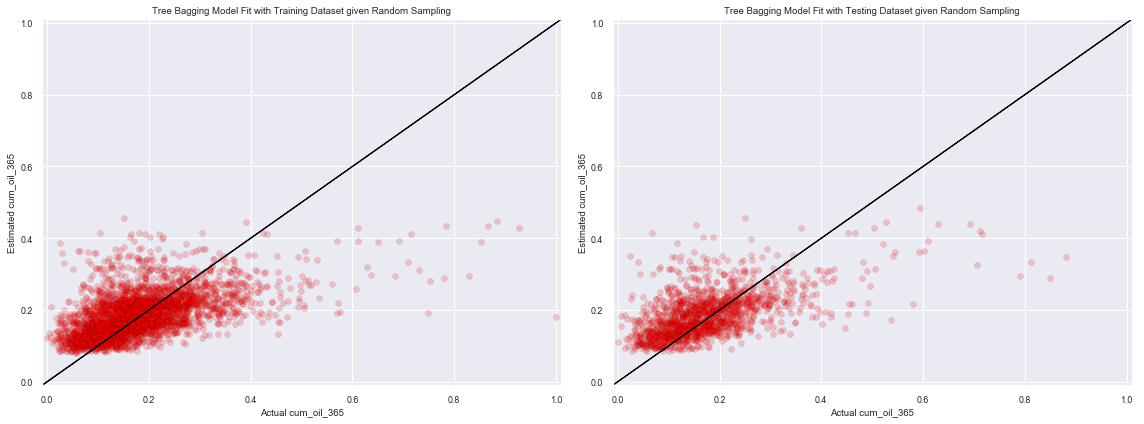

In [10]:
###################################################################################################################
def tree_bagging_prod_prediction_model(random_seed, base_estimators, max_sampless, max_featuress, n_estimatorss, plot_this, plot_min, plot_max, X_train, X_test, y_train, y_test):
    ###################################################################################################################
    # Tree Bagging Hyperparameters
    base_estimator = base_estimators
    max_samples = max_sampless
    max_features = max_featuress
    n_estimators = n_estimatorss
    random_state = random_seed
    ###################################################################################################################
    tb_regressor = BaggingRegressor(base_estimator=base_estimator, max_samples=max_samples, max_features=max_features, n_estimators=n_estimators, random_state=random_state)
    tb_regressor.fit(X=X_train, y=y_train)
    y_pred_train_tb = tb_regressor.predict(X_train)
    y_pred_test_tb = tb_regressor.predict(X_test)

    ###################################################################################################################
    tb_rmse_train, tb_mape_train, tb_ve_train, tb_r2_train, tb_rmse_test, tb_mape_test, tb_ve_test, tb_r2_test = metrics(y_train, y_pred_train_tb, y_test, y_pred_test_tb)
    
    ###################################################################################################################
    if plot_this == True:
        print('Training RMSE: ' + str(round(tb_rmse_train, 3)) + '% , MAPE: ' + str(round(tb_mape_train, 3)) + '% , Exp_var: ' + str(round(tb_ve_train, 3)) + '% , R^2: ' + str(round(tb_r2_train, 3)) + '%')
        print('Testing  RMSE: ' + str(round(tb_rmse_test, 3)) + '% , MAPE: ' + str(round(tb_mape_test, 3)) + '% , Exp_var: ' + str(round(tb_ve_test, 3)) + '% , R^2: ' + str(round(tb_r2_test, 3)) + '%')
        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(y_train, y_pred_train_tb, s=None, c='red', alpha=0.2, linewidths=0.3, edgecolors="black")
        plt.title('Tree Bagging Model Fit with Training Dataset given Random Sampling')
        plt.xlabel('Actual cum_oil_365')
        plt.ylabel('Estimated cum_oil_365')
        plt.xlim(plot_min, plot_max)
        plt.ylim(plot_min, plot_max)
        plt.arrow(plot_min, plot_min, plot_max, plot_max, width=0.001, color='black', head_length=5.0, head_width=0.0)
        plt.subplot(1, 2, 2)
        plt.scatter(y_test, y_pred_test_tb, s=None, c='red', alpha=0.2, linewidths=0.3, edgecolors="black")
        plt.title('Tree Bagging Model Fit with Testing Dataset given Random Sampling')
        plt.xlabel('Actual cum_oil_365')
        plt.ylabel('Estimated cum_oil_365')
        plt.xlim(plot_min, plot_max)
        plt.ylim(plot_min, plot_max)
        plt.arrow(plot_min, plot_min, plot_max, plot_max, width=0.001, color='black', head_length=5.0, head_width=0.0)
        plt.tight_layout()
        plt.show()
    ###################################################################################################################
    return tb_r2_test, tb_ve_test, tb_rmse_test, tb_mape_test
    ###################################################################################################################
tb_r2_test, tb_ve_test, tb_rmse_test, tb_mape_test = tree_bagging_prod_prediction_model(9307, None, 78, 2, 14, True, -0.01, 1.01, X_train, X_test, y_train, y_test)
###################################################################################################################

__Tree Bagging Hyperparameter Tuning:__

Complete of 300:  20,  40,  60,  80,  100,  120,  140,  160,  180,  200,  220,  240,  260,  280,  300,  
Complete of 200:  20,  40,  60,  80,  100,  120,  140,  160,  180,  200,  

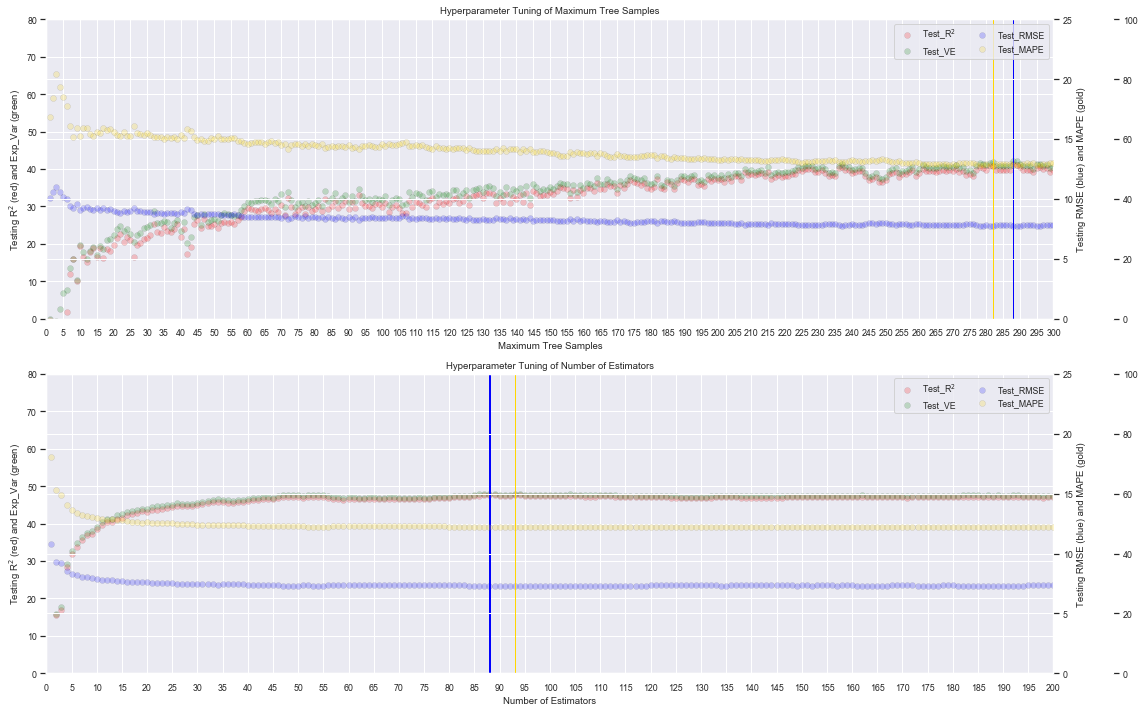

Results achieved with max_samples of:        288
Results achieved with n_estimators of:       88
Results achieved with random_seed of:        9307

For the maximum tree samples:
   Min Testing RMSE Achieved:                7.726%
   Min Testing MAPE Achieved:                51.145%
   Max Testing Explained Variance Achieved:  42.24%
   Max Testing R^2 Achieved:                 41.276%

For the number of estimators:
   Min Testing RMSE Achieved:                7.296%
   Min Testing MAPE Achieved:                48.737%
   Max Testing Explained Variance Achieved:  47.961%
   Max Testing R^2 Achieved:                 47.628%

Training RMSE: 6.863% , MAPE: 51.252% , Exp_var: 51.443% , R^2: 51.438%
Testing  RMSE: 7.296% , MAPE: 48.781% , Exp_var: 47.961% , R^2: 47.628%


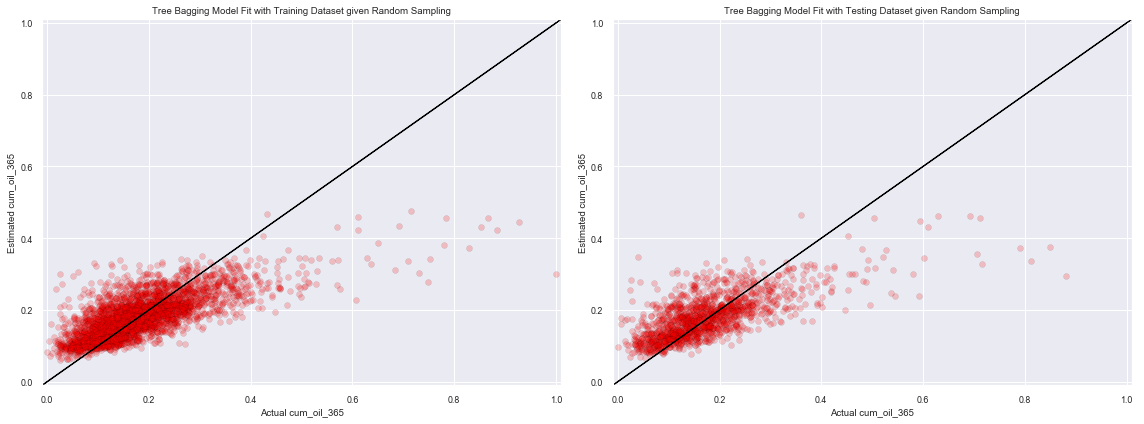

In [11]:
###################################################################################################################
random_seed = 9307
max_samples = np.linspace(1, 300, 300)         # Set the maximum tree samples to consider
tb_hyper_tune_r2 = []
tb_hyper_tune_ve = []
tb_hyper_tune_rmse = []
tb_hyper_tune_mape = []
index = 1
print('Complete of ' + str(len(max_samples)) + ': ', end =" ")
for max_sample in max_samples:                            # Loop over tree samples

    tb_r2_test, tb_ve_test, tb_rmse_test, tb_mape_test = tree_bagging_prod_prediction_model(random_seed, None, int(max_sample), 2, 14, False, -0.01, 1.01, X_train, X_test, y_train, y_test)
    tb_hyper_tune_r2.append([tb_r2_test])
    tb_hyper_tune_ve.append([tb_ve_test])
    tb_hyper_tune_rmse.append([tb_rmse_test])
    tb_hyper_tune_mape.append([tb_mape_test])
    if index % 20 == 0: print(str(index) + ', ', end =" ")
    index += 1

###################################################################################################################
# This gives creates the derived list into a numpy array
tb_hyper_tune_r2_array = np.array(tb_hyper_tune_r2)
tb_hyper_tune_ve_array = np.array(tb_hyper_tune_ve)
tb_hyper_tune_rmse_array = np.array(tb_hyper_tune_rmse)
tb_hyper_tune_mape_array = np.array(tb_hyper_tune_mape)
#########################################################
# This gives the optimal metric value given that hyperparameter value
tb_r2_max_max_samples = np.round(np.max(tb_hyper_tune_r2_array), 3)
tb_exp_var_max_max_samples = np.round(np.max(tb_hyper_tune_ve_array), 3)
tb_rmse_min_max_samples = np.round(np.min(tb_hyper_tune_rmse_array), 3)
tb_mape_min_max_samples = np.round(np.min(tb_hyper_tune_mape_array), 3)
#########################################################
# This gives the index position of the optimal hyperparameter value with respect to the optimal metric value
tb_optimal_r2_max_samples = [i for i, x in enumerate(tb_hyper_tune_r2_array) if x == np.max(tb_hyper_tune_r2_array)][0]
tb_optimal_exp_var_max_samples = [i for i, x in enumerate(tb_hyper_tune_ve_array) if x == np.max(tb_hyper_tune_ve_array)][0]
tb_optimal_rmse_max_samples = [i for i, x in enumerate(tb_hyper_tune_rmse_array) if x == np.min(tb_hyper_tune_rmse_array)][0]
tb_optimal_mape_max_samples = [i for i, x in enumerate(tb_hyper_tune_mape_array) if x == np.min(tb_hyper_tune_mape_array)][0]
#########################################################
# This gives the optimal hyperparameter value for the optimal testing explained variance metric value
tb_max_samples_save_state = int(max_samples[tb_optimal_exp_var_max_samples])
###################################################################################################################
plt.figure(figsize=(16, 10))
ax1 = plt.subplot(2, 1, 1); ax2 = ax1.twinx(); ax02 = ax1.twinx()   # Plot the variance explained & RMSE vs. tree depth
ax02.spines['right'].set_position(('outward', 60))
ax1.arrow(max_samples[tb_optimal_r2_max_samples], 0.0, 0.0, 100.1, width=0.03, color='red', head_length=0.0, head_width=0.0)
s1 = ax1.scatter(max_samples, tb_hyper_tune_r2, c='red', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_R$^2$')
ax1.arrow(max_samples[tb_optimal_exp_var_max_samples], 0.0, 0.0, 100.1, width=0.025, color='green', head_length=0.0, head_width=0.0)
s2 = ax1.scatter(max_samples, tb_hyper_tune_ve, c='green', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_VE')
ax2.arrow(max_samples[tb_optimal_rmse_max_samples], 0.0, 0.0, 100.1, width=0.015, color='blue', head_length=0.0, head_width=0.0)
s3 = ax2.scatter(max_samples, tb_hyper_tune_rmse, c='blue', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_RMSE')
ax02.arrow(max_samples[tb_optimal_mape_max_samples], 0.0, 0.0, 100.1, width=0.01, color='gold', head_length=0.0, head_width=0.0)
s4 = ax02.scatter(max_samples, tb_hyper_tune_mape, c='gold', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_MAPE')
ax1.set_title('Hyperparameter Tuning of Maximum Tree Samples')
ax1.set_xlabel('Maximum Tree Samples')
ax1.set_ylabel('Testing R$^2$ (red) and Exp_Var (green)')
ax2.set_ylabel('Testing RMSE (blue) and MAPE (gold)')
ax1.set_xlim(0.0, 45.0)
ax1.set_ylim(0.0, 80.0)
ax2.set_ylim(0.0, 25.0)
ax02.set_ylim(0.0, 100.0)
ax1.set_xticks(np.arange(max_samples.min()-1, max_samples.max()+2, step=5))
ax2.set_xticks(np.arange(max_samples.min()-1, max_samples.max()+2, step=5))
ax02.set_xticks(np.arange(max_samples.min()-1, max_samples.max()+2, step=5))
plt.legend([s1, s2, s3, s4], ['Test_R$^2$', 'Test_VE', 'Test_RMSE', 'Test_MAPE'], ncol=2)

###################################################################################################################
n_estimators = np.linspace(1, 200, 200)         # Set the optimal number of estimators
tb_hyper_tune_r2 = []
tb_hyper_tune_ve = []
tb_hyper_tune_rmse = []
tb_hyper_tune_mape = []
index = 1
print('\nComplete of ' + str(len(n_estimators)) + ': ', end =" ")
for n_estimator in n_estimators:                            # Loop over number of trees

    tb_r2_test, tb_ve_test, tb_rmse_test, tb_mape_test = tree_bagging_prod_prediction_model(random_seed, None, tb_max_samples_save_state, 2, int(n_estimator), False, -0.01, 1.01, X_train, X_test, y_train, y_test)
    tb_hyper_tune_r2.append([tb_r2_test])
    tb_hyper_tune_ve.append([tb_ve_test])
    tb_hyper_tune_rmse.append([tb_rmse_test])
    tb_hyper_tune_mape.append([tb_mape_test])
    if index % 20 == 0: print(str(index) + ', ', end =" ")
    index += 1

###################################################################################################################
# This gives creates the derived list into a numpy array
tb_hyper_tune_r2_array = np.array(tb_hyper_tune_r2)
tb_hyper_tune_ve_array = np.array(tb_hyper_tune_ve)
tb_hyper_tune_rmse_array = np.array(tb_hyper_tune_rmse)
tb_hyper_tune_mape_array = np.array(tb_hyper_tune_mape)
#########################################################
# This gives the optimal metric value given that hyperparameter value
tb_r2_max_n_estimators = np.round(np.max(tb_hyper_tune_r2_array), 3)
tb_exp_var_max_n_estimators = np.round(np.max(tb_hyper_tune_ve_array), 3)
tb_rmse_min_n_estimators = np.round(np.min(tb_hyper_tune_rmse_array), 3)
tb_mape_min_n_estimators = np.round(np.min(tb_hyper_tune_mape_array), 3)
#########################################################
# This gives the index position of the optimal hyperparameter value with respect to the optimal metric value
tb_optimal_r2_n_estimators = [i for i, x in enumerate(tb_hyper_tune_r2_array) if x == np.max(tb_hyper_tune_r2_array)][0]
tb_optimal_exp_var_n_estimators = [i for i, x in enumerate(tb_hyper_tune_ve_array) if x == np.max(tb_hyper_tune_ve_array)][0]
tb_optimal_rmse_n_estimators = [i for i, x in enumerate(tb_hyper_tune_rmse_array) if x == np.min(tb_hyper_tune_rmse_array)][0]
tb_optimal_mape_n_estimators = [i for i, x in enumerate(tb_hyper_tune_mape_array) if x == np.min(tb_hyper_tune_mape_array)][0]
#########################################################
# This gives the optimal hyperparameter value for the optimal testing explained variance metric value
tb_n_estimators_save_state = int(n_estimators[tb_optimal_exp_var_n_estimators])
###################################################################################################################
ax3 = plt.subplot(2, 1, 2); ax4 = ax3.twinx(); ax04 = ax3.twinx()   # Plot the variance explained & RMSE vs. n_estimators
ax04.spines['right'].set_position(('outward', 60))
ax3.arrow(n_estimators[tb_optimal_r2_n_estimators], 0.0, 0.0, 100.1, width=0.03, color='red', head_length=0.0, head_width=0.0)
s5 = ax3.scatter(n_estimators, tb_hyper_tune_r2, c='red', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_R$^2$')
ax3.arrow(n_estimators[tb_optimal_exp_var_n_estimators], 0.0, 0.0, 100.1, width=0.025, color='green', head_length=0.0, head_width=0.0)
s6 = ax3.scatter(n_estimators, tb_hyper_tune_ve, c='green', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_VE')
ax4.arrow(n_estimators[tb_optimal_rmse_n_estimators], 0.0, 0.0, 100.1, width=0.015, color='blue', head_length=0.0, head_width=0.0)
s7 = ax4.scatter(n_estimators, tb_hyper_tune_rmse, c='blue', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_RMSE')
ax04.arrow(n_estimators[tb_optimal_mape_n_estimators], 0.0, 0.0, 100.1, width=0.01, color='gold', head_length=0.0, head_width=0.0)
s8 = ax04.scatter(n_estimators, tb_hyper_tune_mape, c='gold', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_MAPE')
ax3.set_title('Hyperparameter Tuning of Number of Estimators')
ax3.set_xlabel('Number of Estimators')
ax3.set_ylabel('Testing R$^2$ (red) and Exp_Var (green)')
ax4.set_ylabel('Testing RMSE (blue) and MAPE (gold)')
ax3.set_xlim(0.0, 45.0)
ax3.set_ylim(0.0, 80.0)
ax4.set_ylim(0.0, 25.0)
ax04.set_ylim(0.0, 100.0)
ax3.set_xticks(np.arange(n_estimators.min()-1, n_estimators.max()+2, step=5))
ax4.set_xticks(np.arange(n_estimators.min()-1, n_estimators.max()+2, step=5))
ax04.set_xticks(np.arange(n_estimators.min()-1, n_estimators.max()+2, step=5))
plt.legend([s5, s6, s7, s8], ['Test_R$^2$', 'Test_VE', 'Test_RMSE', 'Test_MAPE'], ncol=2)
plt.tight_layout()
plt.show()
###################################################################################################################
print("Results achieved with max_samples of:        " + str(tb_max_samples_save_state))
print("Results achieved with n_estimators of:       " + str(tb_n_estimators_save_state))
print("Results achieved with random_seed of:        " + str(random_seed))
print("\nFor the maximum tree samples:")
print("   Min Testing RMSE Achieved:                " + str(round(tb_rmse_min_max_samples, 3)) + '%')
print("   Min Testing MAPE Achieved:                " + str(round(tb_mape_min_max_samples, 3)) + '%')
print("   Max Testing Explained Variance Achieved:  " + str(round(tb_exp_var_max_max_samples, 3)) + '%')
print("   Max Testing R^2 Achieved:                 " + str(round(tb_r2_max_max_samples, 3)) + '%')
print("\nFor the number of estimators:")
print("   Min Testing RMSE Achieved:                " + str(round(tb_rmse_min_n_estimators, 3)) + '%')
print("   Min Testing MAPE Achieved:                " + str(round(tb_mape_min_n_estimators, 3)) + '%')
print("   Max Testing Explained Variance Achieved:  " + str(round(tb_exp_var_max_n_estimators, 3)) + '%')
print("   Max Testing R^2 Achieved:                 " + str(round(tb_r2_max_n_estimators, 3)) + '%')
###################################################################################################################
print()
tb_r2_test, tb_ve_test, tb_rmse_test, tb_mape_test = tree_bagging_prod_prediction_model(9307, None, tb_max_samples_save_state, 2, tb_n_estimators_save_state, True, -0.01, 1.01, X_train, X_test, y_train, y_test)
###################################################################################################################

__Tree Bagging Spatial Production Prediction:__

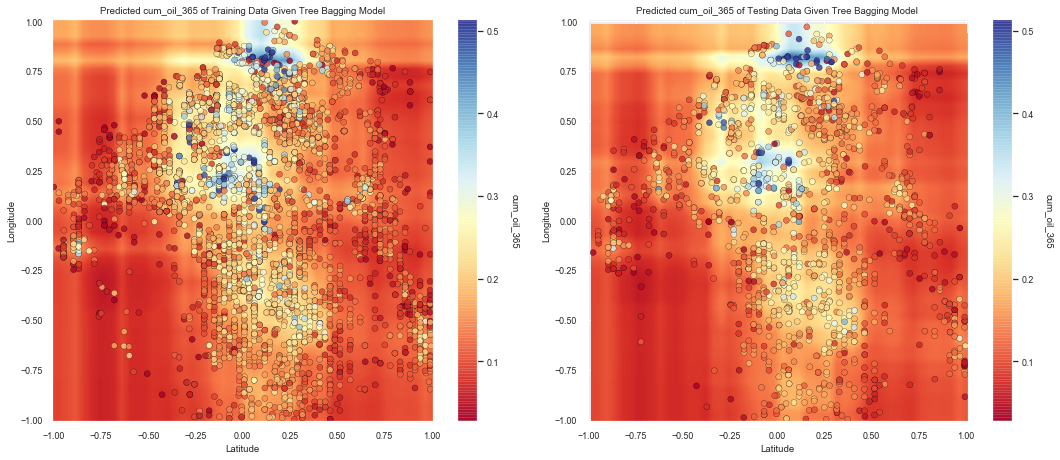

In [12]:
###################################################################################################################
# Update Hyperparameters for 2D Spatial Prediction
tb_regressor_new = BaggingRegressor(base_estimator=None, max_samples=tb_max_samples_save_state, max_features=2, n_estimators=tb_n_estimators_save_state, random_state=9307)
spatial_production_prediction(tb_regressor_new, 'Tree Bagging Model', X_train, X_test, y_train, y_test)
###################################################################################################################

Here we see that we don't achieve as good as results as when using the gradient tree boosting method, but we are able to grow our trees with this method much more complicated with less of a chance of overfitting. And so we see that we are able to predict production spatially with less sensitivity to the choice in parameters. That said, we seem to have a slightly more aggressive production prediction across the map given the lighter color scheme displayed (i.e., not such a dark red, but more of a lighter red indicating higher production). So with that said, one of the downsides here with this method is that if we had a feature with a higher variance over the overs, then the initial tree split would be the same each time given that feature, and so our trees will tend not to grow in a dissimilar matter. Thus, that could or could not be the reasoning behind the slightly higher production prediction throughout. Now, let's look into our last ensemble method, a method that takes care of this issue of similar tree growth: *Random Forest*

#### Random Forest parameters used here:
* __max_depth__: Maximum depth of tree
* __random_state__: To ensure that the same results are obtained each time the workflow is ran
* __n_estimators__: Number of trees in the forest
* __max_features__: Number of features to examine when looking for the best split

Training RMSE: 2.633% , MAPE: 19.435% , Exp_var: 92.85% , R^2: 92.849%
Testing  RMSE: 7.14% , MAPE: 45.928% , Exp_var: 50.017% , R^2: 49.843%


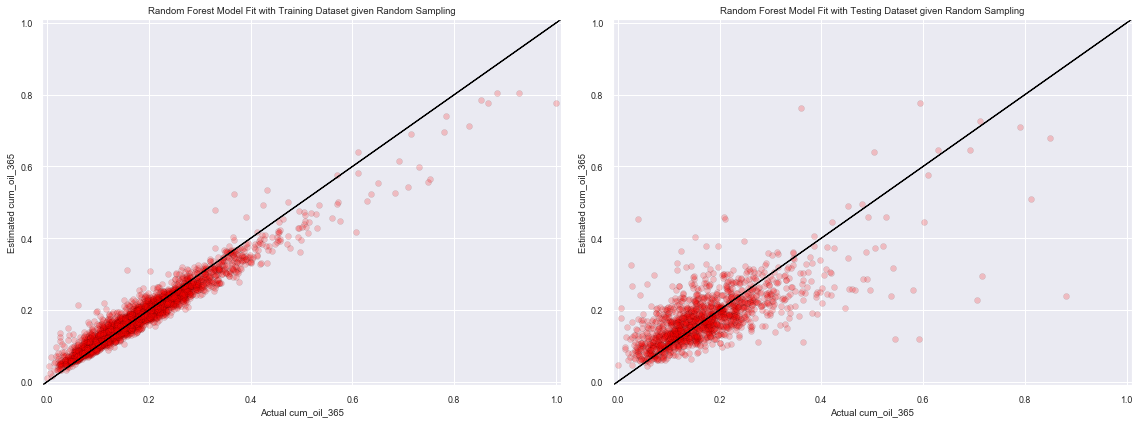

In [13]:
###################################################################################################################
def random_forest_prod_prediction_model(random_seed, max_depth, num_trees_rf, plot_this, plot_min, plot_max, X_train, X_test, y_train, y_test):
    ###################################################################################################################
    # Random Forest Hyperparameters
    max_depth = max_depth
    random_seed = random_seed
    num_trees_rf = num_trees_rf
    max_features = 1
    ###################################################################################################################
    rf_regressor = RandomForestRegressor(oob_score=True, max_depth=max_depth, random_state=random_seed, n_estimators=num_trees_rf, max_features=max_features)
    rf_regressor.fit(X=X_train, y=y_train)
    y_pred_train_rf = rf_regressor.predict(X_train)
    y_pred_test_rf = rf_regressor.predict(X_test)

    ###################################################################################################################
    rf_rmse_train, rf_mape_train, rf_ve_train, rf_r2_train, rf_rmse_test, rf_mape_test, rf_ve_test, rf_r2_test = metrics(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
    
    ###################################################################################################################
    if plot_this == True:
        print('Training RMSE: ' + str(round(rf_rmse_train, 3)) + '% , MAPE: ' + str(round(rf_mape_train, 3)) + '% , Exp_var: ' + str(round(rf_ve_train, 3)) + '% , R^2: ' + str(round(rf_r2_train, 3)) + '%')
        print('Testing  RMSE: ' + str(round(rf_rmse_test, 3)) + '% , MAPE: ' + str(round(rf_mape_test, 3)) + '% , Exp_var: ' + str(round(rf_ve_test, 3)) + '% , R^2: ' + str(round(rf_r2_test, 3)) + '%')
        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(y_train, y_pred_train_rf, s=None, c='red', alpha=0.2, linewidths=0.3, edgecolors="black")
        plt.title('Random Forest Model Fit with Training Dataset given Random Sampling')
        plt.xlabel('Actual cum_oil_365')
        plt.ylabel('Estimated cum_oil_365')
        plt.xlim(plot_min, plot_max)
        plt.ylim(plot_min, plot_max)
        plt.arrow(plot_min, plot_min, plot_max, plot_max, width=0.001, color='black', head_length=5.0, head_width=0.0)
        plt.subplot(1, 2, 2)
        plt.scatter(y_test, y_pred_test_rf, s=None, c='red', alpha=0.2, linewidths=0.3, edgecolors="black")
        plt.title('Random Forest Model Fit with Testing Dataset given Random Sampling')
        plt.xlabel('Actual cum_oil_365')
        plt.ylabel('Estimated cum_oil_365')
        plt.xlim(plot_min, plot_max)
        plt.ylim(plot_min, plot_max)
        plt.arrow(plot_min, plot_min, plot_max, plot_max, width=0.001, color='black', head_length=5.0, head_width=0.0)
        plt.tight_layout()
        plt.show()
    ###################################################################################################################
    return rf_r2_test, rf_ve_test, rf_rmse_test, rf_mape_test
    ###################################################################################################################
rf_r2_test, rf_ve_test, rf_rmse_test, rf_mape_test = random_forest_prod_prediction_model(9307, 25, 100, True, -0.01, 1.01, X_train, X_test, y_train, y_test)
###################################################################################################################

__Random Forest Hyperparameter Tuning:__

Complete of 45:  5,  10,  15,  20,  25,  30,  35,  40,  45,  
Complete of 200:  20,  40,  60,  80,  100,  120,  140,  160,  180,  200,  

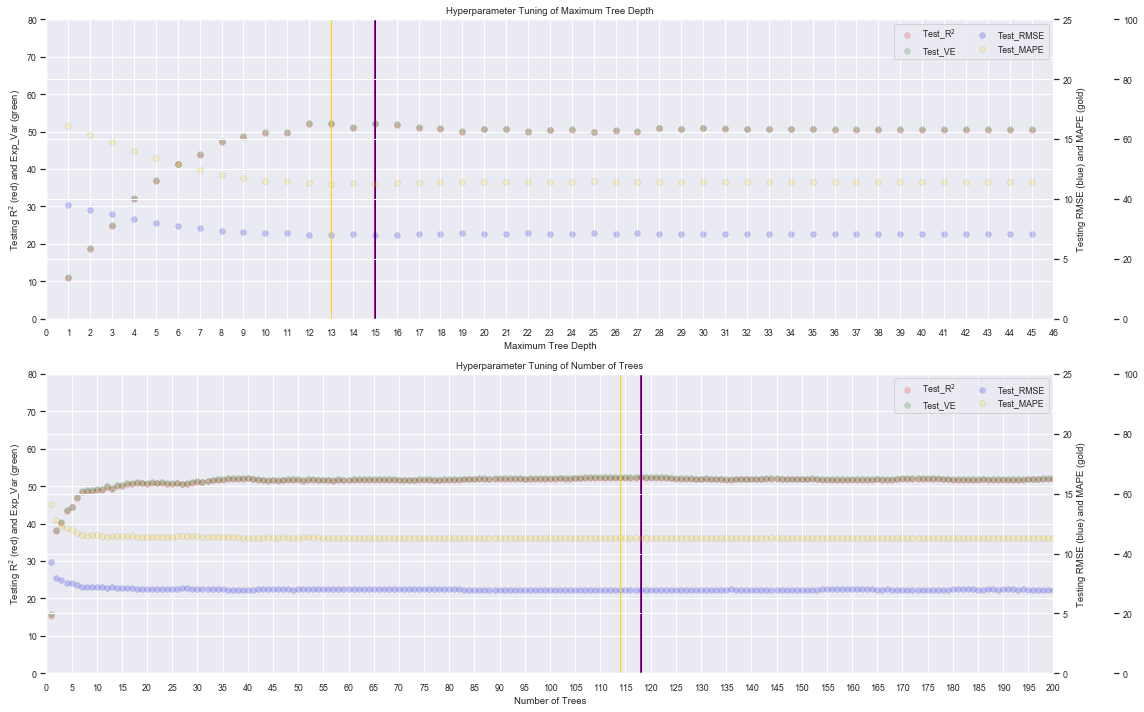

Results achieved with max_depths of:         15
Results achieved with num_trees of:          118
Results achieved with random_seed of:        9307

For the maximum tree depths:
   Min Testing RMSE Achieved:                6.982%
   Min Testing MAPE Achieved:                45.078%
   Max Testing Explained Variance Achieved:  52.23%
   Max Testing R^2 Achieved:                 52.034%

For the number of trees:
   Min Testing RMSE Achieved:                6.959%
   Min Testing MAPE Achieved:                45.08%
   Max Testing Explained Variance Achieved:  52.552%
   Max Testing R^2 Achieved:                 52.352%

Training RMSE: 3.498% , MAPE: 26.121% , Exp_var: 87.38% , R^2: 87.379%
Testing  RMSE: 6.959% , MAPE: 45.115% , Exp_var: 52.552% , R^2: 52.352%


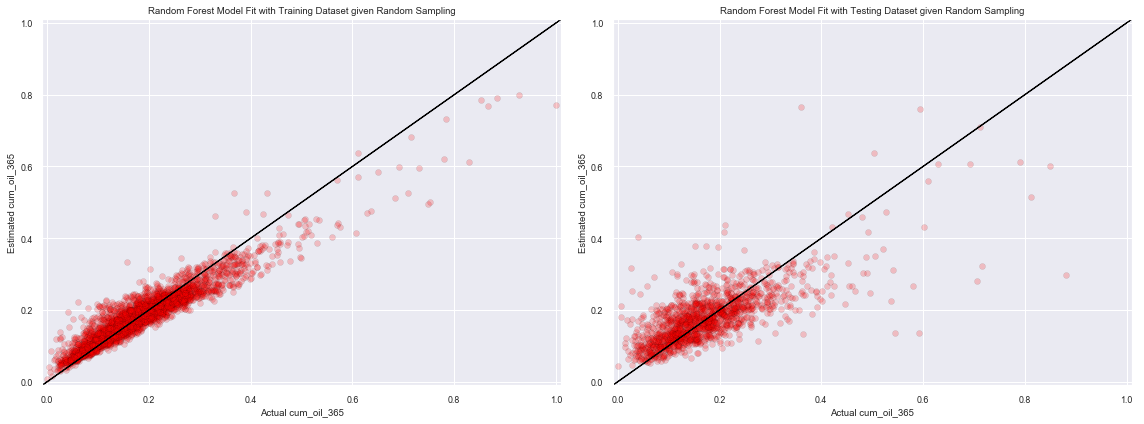

In [14]:
###################################################################################################################
random_seed = 9307
num_tree = 100
max_depths = np.linspace(1, 45, 45)         # Set the maximum tree depths to consider
rf_hyper_tune_r2 = []
rf_hyper_tune_ve = []
rf_hyper_tune_rmse = []
rf_hyper_tune_mape = []
index = 1
print('Complete of ' + str(len(max_depths)) + ': ', end =" ")
for max_depth in max_depths:                            # Loop over tree depths

    rf_r2_test, rf_ve_test, rf_rmse_test, rf_mape_test = random_forest_prod_prediction_model(random_seed, int(max_depth), num_tree, False, -0.01, 1.01, X_train, X_test, y_train, y_test)
    rf_hyper_tune_r2.append([rf_r2_test])
    rf_hyper_tune_ve.append([rf_ve_test])
    rf_hyper_tune_rmse.append([rf_rmse_test])
    rf_hyper_tune_mape.append([rf_mape_test])
    if index % 5 == 0: print(str(index) + ', ', end =" ")
    index += 1

###################################################################################################################
# This gives creates the derived list into a numpy array
rf_hyper_tune_r2_array = np.array(rf_hyper_tune_r2)
rf_hyper_tune_ve_array = np.array(rf_hyper_tune_ve)
rf_hyper_tune_rmse_array = np.array(rf_hyper_tune_rmse)
rf_hyper_tune_mape_array = np.array(rf_hyper_tune_mape)
#########################################################
# This gives the optimal metric value given that hyperparameter value
rf_r2_max_max_depths = np.round(np.max(rf_hyper_tune_r2_array), 3)
rf_exp_var_max_max_depths = np.round(np.max(rf_hyper_tune_ve_array), 3)
rf_rmse_min_max_depths = np.round(np.min(rf_hyper_tune_rmse_array), 3)
rf_mape_min_max_depths = np.round(np.min(rf_hyper_tune_mape_array), 3)
#########################################################
# This gives the index position of the optimal hyperparameter value with respect to the optimal metric value
rf_optimal_r2_max_depths = [i for i, x in enumerate(rf_hyper_tune_r2_array) if x == np.max(rf_hyper_tune_r2_array)][0]
rf_optimal_exp_var_max_depths = [i for i, x in enumerate(rf_hyper_tune_ve_array) if x == np.max(rf_hyper_tune_ve_array)][0]
rf_optimal_rmse_max_depths = [i for i, x in enumerate(rf_hyper_tune_rmse_array) if x == np.min(rf_hyper_tune_rmse_array)][0]
rf_optimal_mape_max_depths = [i for i, x in enumerate(rf_hyper_tune_mape_array) if x == np.min(rf_hyper_tune_mape_array)][0]
#########################################################
# This gives the optimal hyperparameter value for the optimal testing explained variance metric value
rf_max_depths_save_state = int(max_depths[rf_optimal_exp_var_max_depths])
###################################################################################################################
plt.figure(figsize=(16, 10))
ax1 = plt.subplot(2, 1, 1); ax2 = ax1.twinx(); ax02 = ax1.twinx()   # Plot the variance explained & RMSE vs. tree depth
ax02.spines['right'].set_position(('outward', 60))
ax1.arrow(max_depths[rf_optimal_r2_max_depths], 0.0, 0.0, 100.1, width=0.03, color='red', head_length=0.0, head_width=0.0)
s1 = ax1.scatter(max_depths, rf_hyper_tune_r2, c='red', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_R$^2$')
ax1.arrow(max_depths[rf_optimal_exp_var_max_depths], 0.0, 0.0, 100.1, width=0.025, color='green', head_length=0.0, head_width=0.0)
s2 = ax1.scatter(max_depths, rf_hyper_tune_ve, c='green', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_VE')
ax2.arrow(max_depths[rf_optimal_rmse_max_depths], 0.0, 0.0, 100.1, width=0.015, color='blue', head_length=0.0, head_width=0.0)
s3 = ax2.scatter(max_depths, rf_hyper_tune_rmse, c='blue', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_RMSE')
ax02.arrow(max_depths[rf_optimal_mape_max_depths], 0.0, 0.0, 100.1, width=0.01, color='gold', head_length=0.0, head_width=0.0)
s4 = ax02.scatter(max_depths, rf_hyper_tune_mape, c='gold', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_MAPE')
ax1.set_title('Hyperparameter Tuning of Maximum Tree Depth')
ax1.set_xlabel('Maximum Tree Depth')
ax1.set_ylabel('Testing R$^2$ (red) and Exp_Var (green)')
ax2.set_ylabel('Testing RMSE (blue) and MAPE (gold)')
ax1.set_xlim(0.0, 45.0)
ax1.set_ylim(0.0, 80.0)
ax2.set_ylim(0.0, 25.0)
ax02.set_ylim(0.0, 100.0)
ax1.set_xticks(np.arange(max_depths.min()-1, max_depths.max()+2, step=1))
ax2.set_xticks(np.arange(max_depths.min()-1, max_depths.max()+2, step=1))
ax02.set_xticks(np.arange(max_depths.min()-1, max_depths.max()+2, step=1))
plt.legend([s1, s2, s3, s4], ['Test_R$^2$', 'Test_VE', 'Test_RMSE', 'Test_MAPE'], ncol=2)

###################################################################################################################
num_trees = np.linspace(1, 200, 200)         # Set the optimal number of trees
rf_hyper_tune_r2 = []
rf_hyper_tune_ve = []
rf_hyper_tune_rmse = []
rf_hyper_tune_mape = []
index = 1
print('\nComplete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                            # Loop over number of trees

    rf_r2_test, rf_ve_test, rf_rmse_test, rf_mape_test = random_forest_prod_prediction_model(random_seed, rf_max_depths_save_state, int(num_tree), False, -0.01, 1.01, X_train, X_test, y_train, y_test)
    rf_hyper_tune_r2.append([rf_r2_test])
    rf_hyper_tune_ve.append([rf_ve_test])
    rf_hyper_tune_rmse.append([rf_rmse_test])
    rf_hyper_tune_mape.append([rf_mape_test])
    if index % 20 == 0: print(str(index) + ', ', end =" ")
    index += 1

###################################################################################################################
# This gives creates the derived list into a numpy array
rf_hyper_tune_r2_array = np.array(rf_hyper_tune_r2)
rf_hyper_tune_ve_array = np.array(rf_hyper_tune_ve)
rf_hyper_tune_rmse_array = np.array(rf_hyper_tune_rmse)
rf_hyper_tune_mape_array = np.array(rf_hyper_tune_mape)
#########################################################
# This gives the optimal metric value given that hyperparameter value
rf_r2_max_num_trees = np.round(np.max(rf_hyper_tune_r2_array), 3)
rf_exp_var_max_num_trees = np.round(np.max(rf_hyper_tune_ve_array), 3)
rf_rmse_min_num_trees = np.round(np.min(rf_hyper_tune_rmse_array), 3)
rf_mape_min_num_trees = np.round(np.min(rf_hyper_tune_mape_array), 3)
#########################################################
# This gives the index position of the optimal hyperparameter value with respect to the optimal metric value
rf_optimal_r2_num_trees = [i for i, x in enumerate(rf_hyper_tune_r2_array) if x == np.max(rf_hyper_tune_r2_array)][0]
rf_optimal_exp_var_num_trees = [i for i, x in enumerate(rf_hyper_tune_ve_array) if x == np.max(rf_hyper_tune_ve_array)][0]
rf_optimal_rmse_num_trees = [i for i, x in enumerate(rf_hyper_tune_rmse_array) if x == np.min(rf_hyper_tune_rmse_array)][0]
rf_optimal_mape_num_trees = [i for i, x in enumerate(rf_hyper_tune_mape_array) if x == np.min(rf_hyper_tune_mape_array)][0]
#########################################################
# This gives the optimal hyperparameter value for the optimal testing explained variance metric value
rf_num_trees_save_state = int(num_trees[rf_optimal_exp_var_num_trees])
###################################################################################################################
ax3 = plt.subplot(2, 1, 2); ax4 = ax3.twinx(); ax04 = ax3.twinx()   # Plot the variance explained & RMSE vs. n_estimators
ax04.spines['right'].set_position(('outward', 60))
ax3.arrow(num_trees[rf_optimal_r2_num_trees], 0.0, 0.0, 100.1, width=0.03, color='red', head_length=0.0, head_width=0.0)
s5 = ax3.scatter(num_trees, rf_hyper_tune_r2, c='red', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_R$^2$')
ax3.arrow(num_trees[rf_optimal_exp_var_num_trees], 0.0, 0.0, 100.1, width=0.025, color='green', head_length=0.0, head_width=0.0)
s6 = ax3.scatter(num_trees, rf_hyper_tune_ve, c='green', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_VE')
ax4.arrow(num_trees[rf_optimal_rmse_num_trees], 0.0, 0.0, 100.1, width=0.015, color='blue', head_length=0.0, head_width=0.0)
s7 = ax4.scatter(num_trees, rf_hyper_tune_rmse, c='blue', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_RMSE')
ax04.arrow(num_trees[rf_optimal_mape_num_trees], 0.0, 0.0, 100.1, width=0.01, color='gold', head_length=0.0, head_width=0.0)
s8 = ax04.scatter(num_trees, rf_hyper_tune_mape, c='gold', alpha=0.2, linewidths=0.3, edgecolors="black", label='Test_MAPE')
ax3.set_title('Hyperparameter Tuning of Number of Trees')
ax3.set_xlabel('Number of Trees')
ax3.set_ylabel('Testing R$^2$ (red) and Exp_Var (green)')
ax4.set_ylabel('Testing RMSE (blue) and MAPE (gold)')
ax3.set_xlim(0.0, 45.0)
ax3.set_ylim(0.0, 80.0)
ax4.set_ylim(0.0, 25.0)
ax04.set_ylim(0.0, 100.0)
ax3.set_xticks(np.arange(num_trees.min()-1, num_trees.max()+2, step=5))
ax4.set_xticks(np.arange(num_trees.min()-1, num_trees.max()+2, step=5))
ax04.set_xticks(np.arange(num_trees.min()-1, num_trees.max()+2, step=5))
plt.legend([s5, s6, s7, s8], ['Test_R$^2$', 'Test_VE', 'Test_RMSE', 'Test_MAPE'], ncol=2)
plt.tight_layout()
plt.show()
###################################################################################################################
print("Results achieved with max_depths of:         " + str(rf_max_depths_save_state))
print("Results achieved with num_trees of:          " + str(rf_num_trees_save_state))
print("Results achieved with random_seed of:        " + str(random_seed))
print("\nFor the maximum tree depths:")
print("   Min Testing RMSE Achieved:                " + str(round(rf_rmse_min_max_depths, 3)) + '%')
print("   Min Testing MAPE Achieved:                " + str(round(rf_mape_min_max_depths, 3)) + '%')
print("   Max Testing Explained Variance Achieved:  " + str(round(rf_exp_var_max_max_depths, 3)) + '%')
print("   Max Testing R^2 Achieved:                 " + str(round(rf_r2_max_max_depths, 3)) + '%')
print("\nFor the number of trees:")
print("   Min Testing RMSE Achieved:                " + str(round(rf_rmse_min_num_trees, 3)) + '%')
print("   Min Testing MAPE Achieved:                " + str(round(rf_mape_min_num_trees, 3)) + '%')
print("   Max Testing Explained Variance Achieved:  " + str(round(rf_exp_var_max_num_trees, 3)) + '%')
print("   Max Testing R^2 Achieved:                 " + str(round(rf_r2_max_num_trees, 3)) + '%')
###################################################################################################################
print()
rf_r2_test, rf_ve_test, rf_rmse_test, rf_mape_test = random_forest_prod_prediction_model(9307, rf_max_depths_save_state, rf_num_trees_save_state, True, -0.01, 1.01, X_train, X_test, y_train, y_test)
###################################################################################################################

__Random Forest Spatial Production Prediction:__

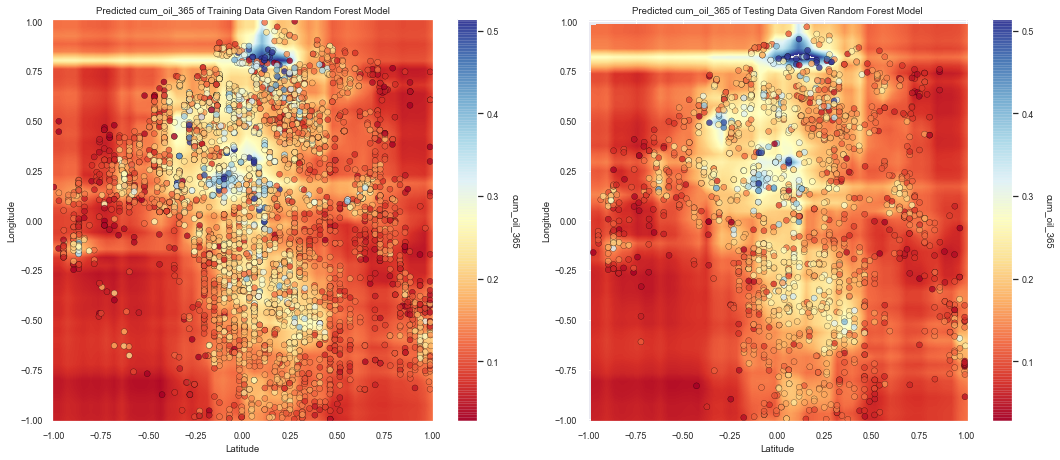

In [15]:
###################################################################################################################
# Update Hyperparameters for 2D Spatial Prediction
rf_regressor_new = RandomForestRegressor(oob_score=True, max_depth=rf_max_depths_save_state, random_state=9307, n_estimators=rf_num_trees_save_state, max_features=1)
spatial_production_prediction(rf_regressor_new, 'Random Forest Model', X_train, X_test, y_train, y_test)
###################################################################################################################

Here we find that the random forest takes the square root of the number of predictive features as a way to ensure that each tree grows in a disimilar manner. We are also able, like in the tree bagging method, to grow the tree very large and complicated, and then prune the tree once results no longer improved as a means of avoiding overfit to the data. As a result, we see that the spatially predicted production shows some good high and low values, and is relatively conservative (i.e., got some more lower and higher values of production predicted overall) versus how tree bagging was slightly more aggressive in its predicted production overall

#### Summary of Workflow:
* In this workflow, we demonstrated the use four different tree based methods, three of which were ensemble methods. Each method first showed initial predictions given two min/max normalized predictive features against that of cum_oil_365, which was also normalized. Following the initial predictions was a demonstration of tuning one or two of a given tree based method's hyperparameters to allow for better cum_oil_365 prediction results in the testing data. After showing the updated cum_oil_365 prediction, a spatial production prediction was performed for both the training dataset and the testing dataset. Each method did relatively well in predicting production, but it was clear that the decision tree had trouble with overfitting, and as a result, we implemented three ensemble methods: gradient tree boosting, tree bagging, and random forest. The gradient tree boosting method gave better results than that of the tree bagging, but appeared sensitive to the choice of parameters when performing the spatial production predictions. That said, this may be more of an issue to how the spatial production prediction function was coded up. Furthermore, tree bagging and random forest (which is a more advanced version of tree bagging) showed less sensitivity to the choice in parameters in regard to the spatially predicting production, where the trees in these methods can be grown to be very complicated and prune back in order to avoid overfitting. However, tree bagging can suffer from trees growing in a similar manner due to having a feature with a variance that dominates over the overs. Whereas random forest splits the trees based on the square root of the number of predictive features to ensure that each tree grows in a different way. As a result, the spatial production prediction results of the random forest method were more conservative and represented a wider range of values overall than the tree bagging method, which could be a result of how each tree grew